In [20]:
import numpy as np
import pandas as pd
import scipy
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import os
from itertools import product

from tools import PatchForager

In [21]:
# Example usage
type_patches = 3
num_patches = 400

#Three alternative ways to generate a list of patches
patch_list = list(range(type_patches)) #equal distribution of patches
# patch_list = [random.randint(0, type_patches-1) for _ in range(num_patches)] #randomly generated list of patched
# patch_list = data # import data from session {To Be Implemented..}

# Initial probabilities of reward in each patch
travel_time = 3
reward_value = [5, 5, 5]

# Create the reward prob matrix
last_rew = 7
a = np.zeros((type_patches, last_rew+1), dtype=int)

# patch 0 has rew early
a[0, :2] = 1

# patch 1 has rew late
a[1, 3:last_rew] = 1

# patch 2 never has rewards

forager = PatchForager(travel_time, reward_value, a, last_rew, '_', '_', prob=False, depl_fxn = 'fixed')
mvt_optimal = forager.calculate_optimal_stops(patch_list)

In [22]:
print(f"Optimal stops: {mvt_optimal['optimal_stops']}")
print(f"Max reward rate: {mvt_optimal['max_reward_rate']}")

Optimal stops: (2, 7, 0)
Max reward rate: 1.6666666666666667


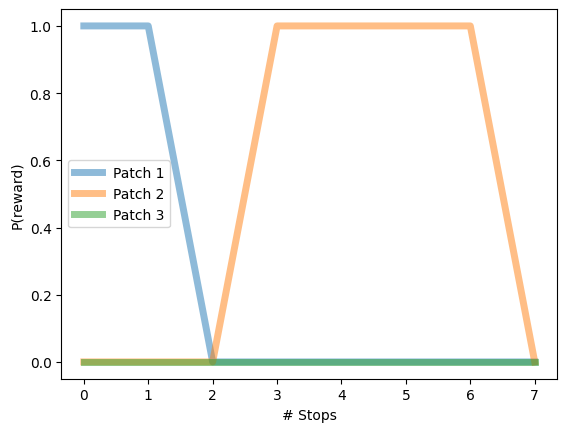

In [23]:
plt.plot(a.T,lw = 5,alpha = .5)

plt.legend(['Patch 1','Patch 2','Patch 3'])
plt.ylabel('P(reward)')
plt.xlabel('# Stops')
plt.show()